# **Santander Customer Transaction Prediction**

## **Powered by Leonardo Cofone**

In [1]:
#install old libraries for compatibility
!pip uninstall -y scikit-learn > /dev/null 2>&1
!pip uninstall -y category-encoders > /dev/null 2>&1
!pip uninstall -y imbalanced-learn > /dev/null 2>&1

!pip install scikit-learn==1.1.3 > /dev/null 2>&1
!pip install imbalanced-learn==0.9.1 > /dev/null 2>&1

**Now the setup is ready, leet's takee a look at the data**

## **1) Analyze and work on data**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

train_set = pd.read_csv("/kaggle/input/santander-customer-transaction-prediction-dataset/train.csv")
test_set = pd.read_csv("/kaggle/input/santander-customer-transaction-prediction-dataset/test.csv")

train_set = train_set.drop(columns=["ID_code"])

2025-04-30 13:16:22.751797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746018982.996413      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746018983.070406      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(f"train: {train_set.shape}")
print(f"test: {test_set.shape}")

train: (200000, 201)
test: (200000, 201)


In [4]:
train_set.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [6]:
train_set.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
train_set.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [8]:
train_set.duplicated().sum()

0

In [9]:
#Check if the classes are unbalanced
print(pd.Series(train_set["target"]).value_counts(normalize=True))

target
0    0.89951
1    0.10049
Name: proportion, dtype: float64


In [10]:
#Try to balance the classes
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import RandomOverSampler

X=train_set.drop(['target'],axis=1)
y=train_set['target']
X_over,y_over=RandomOverSampler().fit_resample(X,y)

X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size=0.2, random_state=42, stratify=y_over)

In [11]:
print(pd.Series(y_train).value_counts(normalize=True))

target
1    0.500002
0    0.499998
Name: proportion, dtype: float64


In [12]:
#Find out which features are categorical, numerical or heavy-tailed
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(include=np.number).columns

print("Categorical features: ", categorical_cols)
print("Numerical features: ", numeric_cols)

from scipy.stats import skew
numeric_cols = X_train.select_dtypes(include=np.number).columns
skewed_feats = X_train[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features = skewed_feats[skewed_feats > 0.8].index.tolist()
skewed_features = [col for col in skewed_features if col in X_train.columns]

print("High skew features:", skewed_features)

Categorical features:  Index([], dtype='object')
Numerical features:  Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)
High skew features: []


## **2) Create a pipeline for a better preprocessing**

In [13]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

categorical_transformer = make_pipeline(                       
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

numeric_transformer = make_pipeline(              
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessor = ColumnTransformer([   
    ("cat", categorical_transformer, categorical_cols),
    ("num", numeric_transformer, numeric_cols),
])

## **3) Train and evaluate on different model**

In [14]:
#TRAIN A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

log_reg = Pipeline([
    ("preprocessor1", preprocessor),
    ("log_reg", LogisticRegression(random_state=42)),
])

log_reg.fit(X_train, y_train)

#EVALUATE THE MODEL

y_val_pred_1 = log_reg.predict(X_val)

print("Confusion Matrix For Logistic Regression:\n", confusion_matrix(y_val, y_val_pred_1))

print(f"Precision: { precision_score(y_val, y_val_pred_1)}")
print(f"Recall: {recall_score(y_val, y_val_pred_1)}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_1)}")

y_val_pred_proba_1 = log_reg.predict_proba(X_val)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_val, y_val_pred_proba_1)}")

Confusion Matrix For Logistic Regression:
 [[28256  7725]
 [ 7946 28034]]
Precision: 0.783970468972846
Recall: 0.7791550861589772
F1 Score: 0.7815553604036856
ROC AUC Score: 0.8610046916707738


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ("preprocessor1", preprocessor),
    ("rf", RandomForestClassifier(random_state=42))
])

rf_model.fit(X_train, y_train)

y_val_pred_2 = rf_model.predict(X_val)

print("Confusion Matrix For Random Forest:\n", confusion_matrix(y_val, y_val_pred_2))
print(f"Precision: {precision_score(y_val, y_val_pred_2)}")
print(f"Recall: {recall_score(y_val, y_val_pred_2)}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_2)}")

y_val_pred_proba_2 = rf_model.predict_proba(X_val)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_val, y_val_pred_proba_2)}")

Confusion Matrix For Random Forest:
 [[35980     1]
 [   10 35970]]
Precision: 0.999972199827639
Recall: 0.999722067815453
F1 Score: 0.9998471181776487
ROC AUC Score: 0.9999657074585672


### **we have found a solid model**

AUC Score: 1.0000


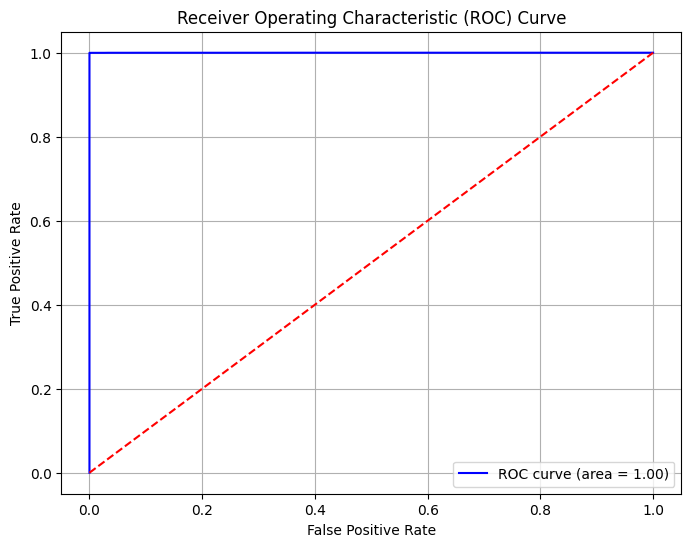

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_val_proba = rf_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

## **4) Save the model andd make the final predictions on the test set**

In [17]:
import joblib
joblib.dump({'model': rf_model}, 'model_RF_final.pkl')

['model_RF_final.pkl']

In [18]:
X_test = test_set.drop(columns=["ID_code"])
final_predictions = rf_model.predict(test_set)

final_submission = pd.DataFrame({
    'ID_code': test_set['ID_code'],
    'targeet': final_predictions
})

final_submission.to_csv("/kaggle/working/final_submission.csv", index=False)
print("Final submission saved as final_submission.csv")

Final submission saved as final_submission.csv
